<a href="https://colab.research.google.com/github/dzikri200/TUGAS_TEXT_MINING/blob/main/klasteringrevisi_0070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Sastrawi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 6.4 MB/s 


In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup# Buat request ke website
r = requests.get('https://bola.kompas.com/')
soup = BeautifulSoup(r.content, 'html.parser')# Buat object untuk parse((mengurai) format HTML 
link = []
# Ambil semua tautan berita yang menarik
for i in soup.find('div', {'class':'most__wrap'}).find_all('a'): 
    
    i['href'] = i['href'] + '?page=all'
    link.append(i['href'])
    #dari tiap tautan ambil paragraph, kombinasikan tiap paragraph
    #simpan ke dalam larik documents
    
documents = []
for i in link:
    # Buat request ke tautan
    r = requests.get(i)
    # Initialize BeautifulSoup object untuk parse/mengurai isi 
    soup = BeautifulSoup(r.content, 'html.parser')
    # ambil semua paragraph dan masukkan ke dalam larik sen
    sen = []
    for i in soup.find('div', {'class':'read__content'}).find_all('p'):
        sen.append(i.text)
    # tabahkan semua paragraph yang sudah digabungkan ke dalam larik documents
    documents.append(' '.join(sen))

In [ ]:
for d in documents:
    print(d)

KOMPAS.com - Arkhan Kaka tak kuasa menahan tangisnya usai timnas U17 Indonesia kalah dari Malaysia pada laga terakhir Grup B Kualifikasi Piala Asia U17 2023. Tangis Arkhan Kaka pecah seiring berbunyinya peluit panjang tanda berakhirnya laga timnas U17 Indonesia vs Malaysia di Stadion Pakansari, Bogor, Minggu (9/10/2022) malam WIB. Laga Indonesia vs Malaysia sangat berarti bagi Arkhan Kaka. Sebab, laga ini memperebutkan status sebagai juara Grup B yang berhadiah tiket otomatis ke putaran final Piala Asia U17 2023. Namun, timnas U17 Indonesia kalah 1-5 dari Malaysia. Lima gol Malaysia diciptakan oleh Zainurhakimi Zain (18'), Arami Wafiy (21', 40' penalti), Anjasmirza Saharudin (24'), dan Afiq Danish Zulfkifli (28'). Baca juga: Timnas U17 Indonesia Tak Lolos Piala Asia, Salah Strategi hingga Habis Bensin Adapun satu-satunya gol balasan timnas U17 Indonesia diciptakan oleh Arkhan Kaka pada menit ke-90+2. Akan tetapi, gol Arkhan Kaka itu tak bisa menyelamatkan Indonesia dari kekalahan. Usai

In [ ]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in documents:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [ ]:
documents_clean[0:5]

['kompas com arkhan kaka tak kuasa tahan tangis usai timnas u indonesia kalah malaysia laga akhir grup b kualifikasi piala asia u tangis arkhan kaka pecah iring bunyi peluit panjang tanda akhir laga timnas u indonesia vs malaysia stadion pakansari bogor minggu malam wib laga indonesia vs malaysia sangat arti arkhan kaka laga rebut status bagai juara grup b hadiah tiket otomatis putar final piala asia u timnas u indonesia kalah malaysia lima gol malaysia cipta zainurhakimi zain aram wafiy penalti anjasmirza saharudin afiq danish zulfkifli baca timnas u indonesia tak lolos piala asia salah strategi hingga habis bensin adapun satu gol balas timnas u indonesia cipta arkhan kaka menit ke tetapi gol arkhan kaka tak selamat indonesia kalah usai tanding remaja nama lengkap arkhan kaka putra purwanto tak kuasa tahan sedih main lahir blitar september menang lihat tunduk lesu lapang rekan tim arkhan kaka riski afrisal lalu datang hampir main nomor punggung lihat bantu semangat arkhan kompas com k

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

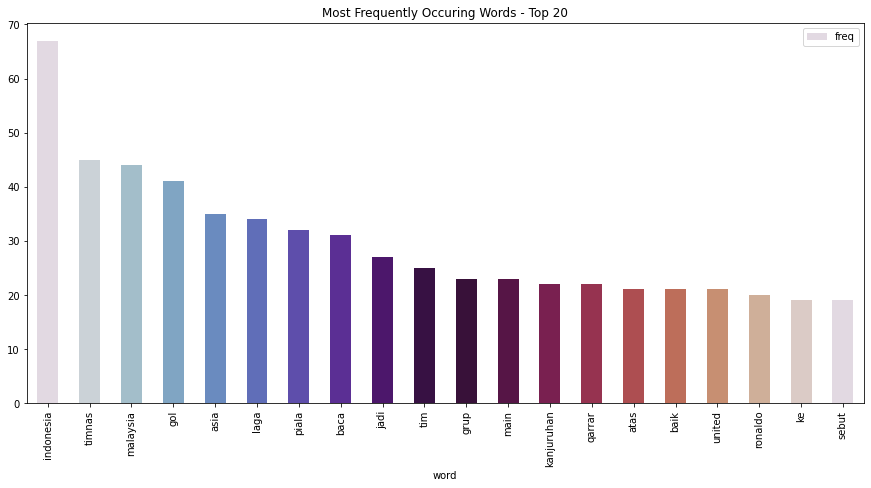

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [ ]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 indonesia
 malaysia
 timnas
 asia
 piala
 grup
 baik
 kalah
 kualifikasi
 arkhan
Cluster 1:
 gol
 kanjuruhan
 united
 ronaldo
 jadi
 laga
 pintu
 sebut
 baca
 mata
Cluster 2:
 qarrar
 balap
 firhand
 italia
 seri
 finale
 posisi
 auttuno
 tampil
 baca




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Prediction")
Y = cv.transform(["piala dunia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ronaldo"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [1]
Cluster number : [1]


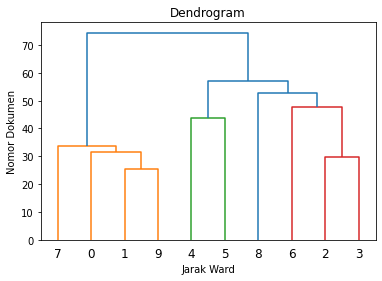

In [ ]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

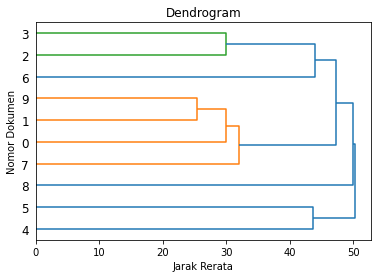

In [ ]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 2 2 5 3 4 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


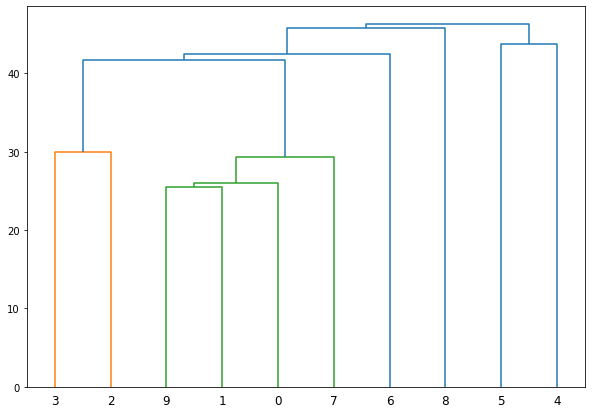

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

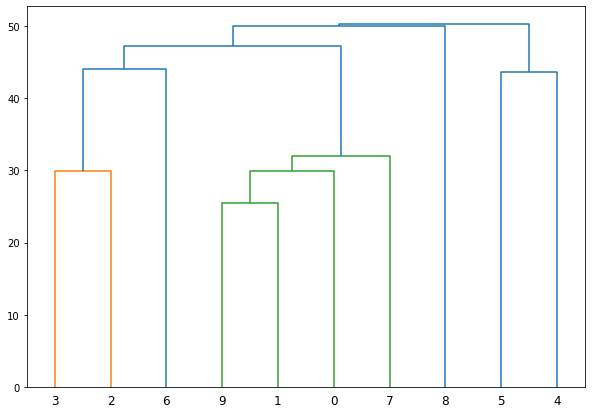

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()